# Preparing Dataset


In [ ]:
# INF2178 Assignment 2

# Library imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
%pip install bioinfokit
from bioinfokit.analys import stat

# Read input file
file_path = '/content/INF2178_A2_data.xlsx'
df = pd.read_excel(file_path)

In [ ]:
# Create an output file
import matplotlib.backends.backend_pdf as pdf_backend
pdf_filename = 'output_report.pdf'
pdf_pages = pdf_backend.PdfPages(pdf_filename)

In [ ]:
# Display information on dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1063 entries, 0 to 1062
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   _id              1063 non-null   int64  
 1   LOC_ID           1063 non-null   int64  
 2   LOC_NAME         1063 non-null   object 
 3   AUSPICE          1063 non-null   object 
 4   ADDRESS          1063 non-null   object 
 5   PCODE            1063 non-null   object 
 6   ward             1063 non-null   int64  
 7   bldg_type        1063 non-null   object 
 8   BLDGNAME         715 non-null    object 
 9   IGSPACE          1063 non-null   int64  
 10  TGSPACE          1063 non-null   int64  
 11  PGSPACE          1063 non-null   int64  
 12  KGSPACE          1063 non-null   int64  
 13  SGSPACE          1063 non-null   int64  
 14  TOTSPACE         1063 non-null   int64  
 15  subsidy          1063 non-null   object 
 16  cwelcc_flag      1063 non-null   object 
 17  IGSPACE_PERCEN

In [ ]:
# Display initial rows of dataset
print(df.head(10))

   _id  LOC_ID                                           LOC_NAME  \
0    1    1013              Lakeshore Community Child Care Centre   
1    2    1014            Alternative Primary School Parent Group   
2    3    1015     Cardinal Leger Child Care Centre (Scarborough)   
3    4    1016  George Brown - Richmond Adelaide Childcare Centre   
4    5    1017  Woodland Nursery School (Warden Woods Communit...   
5    6    1021  Centennial College Progress Campus Child Care ...   
6    7    1029                       Air-O-Down Child Care Centre   
7    8    1031            Cedarbrae Day Nurseries (20 Greencrest)   
8    9    1037                  Tiago Avenue Community Child Care   
9   10    1041                    Ledbury Park Child Care Program   

             AUSPICE              ADDRESS    PCODE  ward  \
0  Non Profit Agency       101 SEVENTH ST  M8V 3B5     3   
1  Non Profit Agency      1100 SPADINA RD  M5N 2M6     8   
2  Non Profit Agency       600 MORRISH RD  M1C 4Y1    25   


In [ ]:
nan_count = df.isna().sum()
print(nan_count)

_id              0
LOC_ID           0
LOC_NAME         0
AUSPICE          0
ADDRESS          0
PCODE            0
ward             0
bldg_type        0
BLDGNAME       348
IGSPACE          0
TGSPACE          0
PGSPACE          0
KGSPACE          0
SGSPACE          0
TOTSPACE         0
subsidy          0
cwelcc_flag      0
dtype: int64


In [ ]:
# calculate the mean of each column
mean = df.mean()

# fill NaN values with the mean of each column
df.fillna(mean, inplace=True)
print(df)

       _id  LOC_ID                                           LOC_NAME  \
0        1    1013              Lakeshore Community Child Care Centre   
1        2    1014            Alternative Primary School Parent Group   
2        3    1015     Cardinal Leger Child Care Centre (Scarborough)   
3        4    1016  George Brown - Richmond Adelaide Childcare Centre   
4        5    1017  Woodland Nursery School (Warden Woods Communit...   
...    ...     ...                                                ...   
1058  1059   14492       The Neighbourhood Group Downsview Child Care   
1059  1060   14496                               Lawrence Park School   
1060  1061   14497  The Munchkin Manor Daycare & Early Learning Ce...   
1061  1062   14501     Columbus Early Learning Centres - Regina Mundi   
1062  1063   14504                             Brightpath Leslieville   

                AUSPICE            ADDRESS    PCODE  ward  \
0     Non Profit Agency     101 SEVENTH ST  M8V 3B5     3   
1

<ipython-input-7-ffd74fc8604e>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean = df.mean()


In [ ]:
# Create continuous variables on capacity numbers percent of total space
df['IGSPACE_PERCENT'] = (df['IGSPACE'] / df['TOTSPACE']) * 100
df['TGSPACE_PERCENT'] = (df['TGSPACE'] / df['TOTSPACE']) * 100
df['PGSPACE_PERCENT'] = (df['PGSPACE'] / df['TOTSPACE']) * 100
df['KGSPACE_PERCENT'] = (df['KGSPACE'] / df['TOTSPACE']) * 100
df['SGSPACE_PERCENT'] = (df['SGSPACE'] / df['TOTSPACE']) * 100

# Display the updated DataFrame
print(df[['LOC_NAME', 'IGSPACE_PERCENT', 'TGSPACE_PERCENT', 'PGSPACE_PERCENT', 'KGSPACE_PERCENT', 'SGSPACE_PERCENT']])

                                               LOC_NAME  IGSPACE_PERCENT  \
0                 Lakeshore Community Child Care Centre         0.000000   
1               Alternative Primary School Parent Group         0.000000   
2        Cardinal Leger Child Care Centre (Scarborough)         0.000000   
3     George Brown - Richmond Adelaide Childcare Centre        15.384615   
4     Woodland Nursery School (Warden Woods Communit...         0.000000   
...                                                 ...              ...   
1058       The Neighbourhood Group Downsview Child Care         0.000000   
1059                               Lawrence Park School         0.000000   
1060  The Munchkin Manor Daycare & Early Learning Ce...         0.000000   
1061     Columbus Early Learning Centres - Regina Mundi         0.000000   
1062                             Brightpath Leslieville        19.480519   

      TGSPACE_PERCENT  PGSPACE_PERCENT  KGSPACE_PERCENT  SGSPACE_PERCENT  
0           

# Summary Statistics

In [ ]:
# Function for summary statistics
def get_summary_statistics(dataset, label='Dataset'):

    mean = np.round(np.mean(dataset), 2)
    median = np.round(np.median(dataset), 2)
    min_value = np.round(dataset.min(), 2)
    max_value = np.round(dataset.max(), 2)
    quartile_1 = np.round(dataset.quantile(0.25), 2)
    quartile_3 = np.round(dataset.quantile(0.75), 2)

    # Interquartile range
    iqr = np.round(quartile_3 - quartile_1, 2)

    print(f'{label} Summary Statistics:')
    print('Min: %s' % min_value)
    print('Mean: %s' % mean)
    print('Max: %s' % max_value)
    print('25th percentile: %s' % quartile_1)
    print('Median: %s' % median)
    print('75th percentile: %s' % quartile_3)
    print('Interquartile range (IQR): %s' % iqr)
    print('\n\n')

In [ ]:
# Select relevant data columns
selected_data = df[['IGSPACE', 'TGSPACE', 'PGSPACE', 'KGSPACE', 'SGSPACE', "TOTSPACE"]].copy()

# Fill missing values with the mean of the column
selected_data.fillna(selected_data.mean(numeric_only=True), inplace=True)

In [ ]:
# Display summary statistics for relevant columns
get_summary_statistics(selected_data['IGSPACE'], label='IGSPACE')
get_summary_statistics(selected_data['TGSPACE'], label='TGSPACE')
get_summary_statistics(selected_data['PGSPACE'], label='PGSPACE')
get_summary_statistics(selected_data['KGSPACE'], label='KGSPACE')
get_summary_statistics(selected_data['SGSPACE'], label='SGSPACE')
get_summary_statistics(selected_data['TOTSPACE'], label='TOTSPACE')

IGSPACE Summary Statistics:
Min: 0
Mean: 3.9
Max: 30
25th percentile: 0.0
Median: 0.0
75th percentile: 10.0
Interquartile range (IQR): 10.0



TGSPACE Summary Statistics:
Min: 0
Mean: 11.6
Max: 90
25th percentile: 0.0
Median: 10.0
75th percentile: 15.0
Interquartile range (IQR): 15.0



PGSPACE Summary Statistics:
Min: 0
Mean: 24.26
Max: 144
25th percentile: 16.0
Median: 24.0
75th percentile: 32.0
Interquartile range (IQR): 16.0



KGSPACE Summary Statistics:
Min: 0
Mean: 14.26
Max: 130
25th percentile: 0.0
Median: 0.0
75th percentile: 26.0
Interquartile range (IQR): 26.0



SGSPACE Summary Statistics:
Min: 0
Mean: 21.66
Max: 285
25th percentile: 0.0
Median: 0.0
75th percentile: 30.0
Interquartile range (IQR): 30.0



TOTSPACE Summary Statistics:
Min: 6
Mean: 75.67
Max: 402
25th percentile: 43.0
Median: 62.0
75th percentile: 97.0
Interquartile range (IQR): 54.0





# One-Way ANOVA

In [ ]:
# Reshape the dataframe suitable for statsmodels package
df_melt = pd.melt(df.reset_index(), id_vars=['_id'], value_vars=['IGSPACE', 'TGSPACE', 'PGSPACE', 'KGSPACE', 'SGSPACE'])

In [ ]:
# Replace column names
df_melt.columns = ['_id', 'childcarespaces', 'value']

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 95.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 92.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 88.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 90.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 86.0% of the points cannot be plac

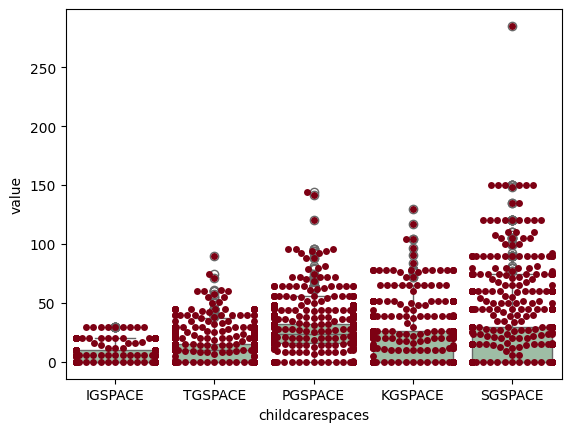

In [ ]:
# Generate a boxplot to see the data distribution by childcare spaces
ax = sns.boxplot(x='childcarespaces', y='value', data=df_melt, color='#99c2a2')
ax = sns.swarmplot(x='childcarespaces', y='value', data=df_melt, color='#7d0013')
plt.show()

In [ ]:
# Ordinary Least Squares (OLS) model
model = ols('value ~ C(childcarespaces)', data=df_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

# ANOVA table
res = stat()
res.anova_stat(df=df_melt, res_var='value', anova_model='value ~ C(childcarespaces)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(childcarespaces),4.0,2.821233e+05,70530.816839,188.190768,4.517383e-151
Residual,5310.0,1.990101e+06,374.783617,NaN,NaN


In [ ]:
# Post hoc test using Tukey's HSD
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=df_melt['value'], groups=df_melt['childcarespaces'], alpha=0.05)
print(tukey.summary())

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1  group2 meandiff p-adj   lower    upper   reject
--------------------------------------------------------
IGSPACE KGSPACE  10.3612    0.0   8.0699  12.6526   True
IGSPACE PGSPACE  20.3622    0.0  18.0708  22.6536   True
IGSPACE SGSPACE  17.7648    0.0  15.4734  20.0562   True
IGSPACE TGSPACE   7.7037    0.0   5.4123    9.995   True
KGSPACE PGSPACE  10.0009    0.0   7.7096  12.2923   True
KGSPACE SGSPACE   7.4036    0.0   5.1122    9.695   True
KGSPACE TGSPACE  -2.6576 0.0135  -4.9489  -0.3662   True
PGSPACE SGSPACE  -2.5974  0.017  -4.8887   -0.306   True
PGSPACE TGSPACE -12.6585    0.0 -14.9499 -10.3671   True
SGSPACE TGSPACE -10.0611    0.0 -12.3525  -7.7698   True
--------------------------------------------------------


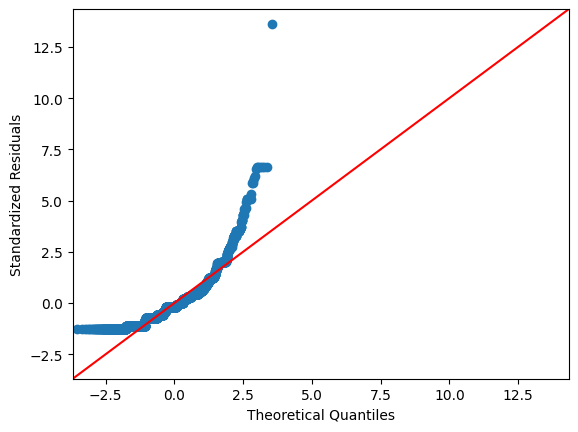

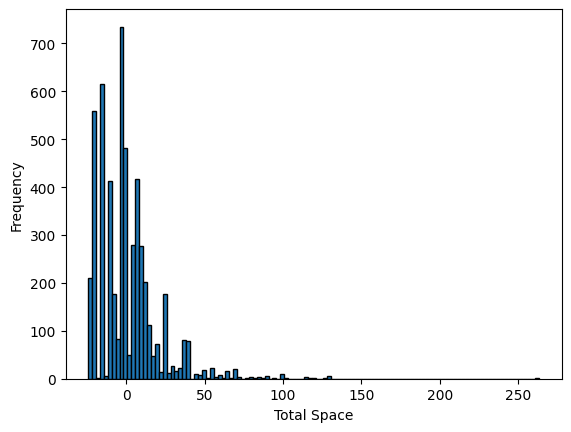

In [ ]:
#checking model diagnostics
import statsmodels.api as sm
import matplotlib.pyplot as plt

# assumption 1: res.anova_std_residuals are standardized residuals obtained from ANOVA
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

# histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k')
plt.xlabel("Total Space")
plt.ylabel('Frequency')
plt.show()

In [ ]:
#assumption 1: residuals are normally distributed: Shapiro Wilk test
w, pvalue = stats.shapiro(model.resid)
print(w,pvalue)

0.8427014350891113 0.0


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
# Assumption 2: Variances are homogeneous (Bartlett's test)
# List of child care spaces columns
child_care_columns = ['IGSPACE', 'TGSPACE', 'PGSPACE', 'KGSPACE', 'SGSPACE', 'TOTSPACE']

# Perform Bartlett's test for all child care spaces columns
bartlett_results = []

for col in child_care_columns:
    bartlett_stat, pvalue_bartlett = stats.bartlett(*[group[col] for _, group in df.groupby('AUSPICE')])
    bartlett_results.append((col, bartlett_stat, pvalue_bartlett))

# Print Bartlett's test results for each child care spaces column
for col, bartlett_stat, pvalue_bartlett in bartlett_results:
    print(f"Bartlett's Test Statistic for {col}: {bartlett_stat}")
    print(f"P-value for {col}: {pvalue_bartlett}")
    print()

res = stat()
res.bartlett(df=df_melt, res_var='value', xfac_var='childcarespaces')
res.bartlett_summary

Bartlett's Test Statistic for IGSPACE: 43.15547811474178
P-value for IGSPACE: 4.2550728059885596e-10

Bartlett's Test Statistic for TGSPACE: 60.71786014988976
P-value for TGSPACE: 6.535580855930413e-14

Bartlett's Test Statistic for PGSPACE: 51.84709271183662
P-value for PGSPACE: 5.515017136812434e-12

Bartlett's Test Statistic for KGSPACE: 218.50100538899926
P-value for KGSPACE: 3.573629582950714e-48

Bartlett's Test Statistic for SGSPACE: 275.95130283378694
P-value for SGSPACE: 1.1965640556038172e-60

Bartlett's Test Statistic for TOTSPACE: 89.58603867335393
P-value for TOTSPACE: 3.520779884632816e-20



,Parameter,Value
0,Test statistics (T),2461.7361
1,Degrees of freedom (Df),4.0000
2,p value,0.0000


In [ ]:
#assumption 2: variances are homogenous: Levene's test when the sample is not normally distributed
res.levene(df=df_melt, res_var='value', xfac_var='childcarespaces')
res.levene_summary

,Parameter,Value
0,Test statistics (W),142.6228
1,Degrees of freedom (Df),4.0000
2,p value,0.0000


# Two-Way ANOVA

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 49.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 27.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 47.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 26.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


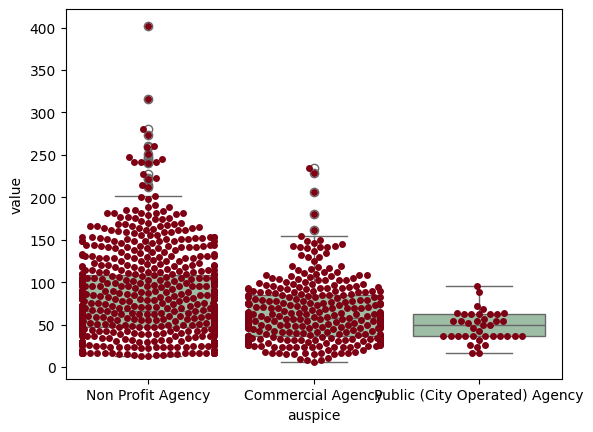

In [ ]:
df_melt = pd.melt(df.reset_index(), id_vars=['_id', 'AUSPICE'], value_vars=['TOTSPACE'])

# replace column names
df_melt.columns = ['index', 'auspice', 'childcarespaces', 'value']

# boxplot to see the data distribution by auspices
ax = sns.boxplot(x='auspice', y='value', data=df_melt, color='#99c2a2')
ax = sns.swarmplot(x='auspice', y='value', data=df_melt, color='#7d0013')
plt.show()

In [ ]:
# Ordinary Least Squares (OLS) model
model = ols('value ~ C(auspice)', data=df_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

# ANOVA table
res = stat()
res.anova_stat(df=df_melt, res_var='value', anova_model='value ~ C(auspice)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(auspice),2.0,9.611211e+04,48056.057145,21.843051,5.057716e-10
Residual,1060.0,2.332065e+06,2200.061571,NaN,NaN


In [ ]:
#post hoc test using Scheffe's test or Tukey's HSD
res = stat()
res.tukey_hsd(df=df_melt, res_var='value', xfac_var='auspice', anova_model='value ~ C(auspice)')
res.tukey_summary

/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to 

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,Non Profit Agency,Commercial Agency,17.119417,9.703599,24.535235,7.662434,0.001000
1,Non Profit Agency,Public (City Operated) Agency,34.334610,16.224077,52.445142,6.292710,0.001000
2,Commercial Agency,Public (City Operated) Agency,17.215193,-1.453146,35.883531,3.060857,0.077966


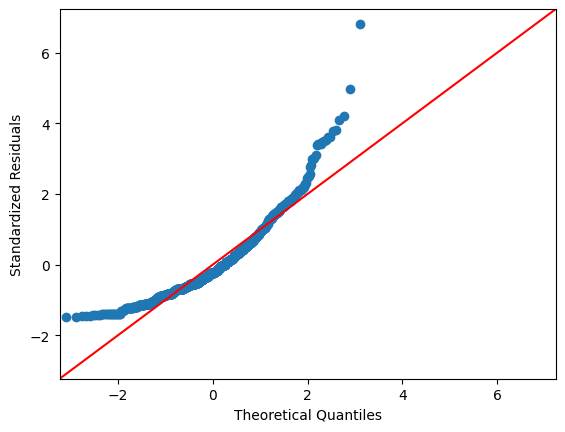

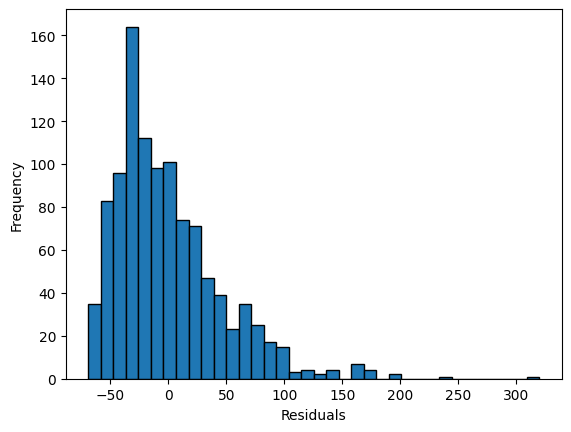

In [ ]:
#checking model diagnostics
import statsmodels.api as sm
import matplotlib.pyplot as plt

# assumption 1: res.anova_std_residuals are standardized residuals obtained from ANOVA (check above)
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

# histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k')
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [ ]:
#assumption 1: residuals are normally distributed: Shapiro Wilk test
w, pvalue = stats.shapiro(model.resid)
print(w,pvalue)


0.901775598526001 1.4964898448030214e-25


In [ ]:
# Assumption 2: Variances are homogeneous (Bartlett's test)
# List of child care spaces columns
child_care_columns = ['IGSPACE', 'TGSPACE', 'PGSPACE', 'KGSPACE', 'SGSPACE', 'TOTSPACE']

# Bartlett's test for all child care spaces columns
bartlett_results = []

for col in child_care_columns:
    bartlett_stat, pvalue_bartlett = stats.bartlett(*[group[col] for _, group in df.groupby('AUSPICE')])
    bartlett_results.append((col, bartlett_stat, pvalue_bartlett))

# Bartlett's test results for each child care spaces column
for col, bartlett_stat, pvalue_bartlett in bartlett_results:
    print(f"Bartlett's Test Statistic for {col}: {bartlett_stat}")
    print(f"P-value for {col}: {pvalue_bartlett}")
    print()

res = stat()
res.bartlett(df=df_melt, res_var='value', xfac_var='auspice')
res.bartlett_summary

Bartlett's Test Statistic for IGSPACE: 43.15547811474178
P-value for IGSPACE: 4.2550728059885596e-10

Bartlett's Test Statistic for TGSPACE: 60.71786014988976
P-value for TGSPACE: 6.535580855930413e-14

Bartlett's Test Statistic for PGSPACE: 51.84709271183662
P-value for PGSPACE: 5.515017136812434e-12

Bartlett's Test Statistic for KGSPACE: 218.50100538899926
P-value for KGSPACE: 3.573629582950714e-48

Bartlett's Test Statistic for SGSPACE: 275.95130283378694
P-value for SGSPACE: 1.1965640556038172e-60

Bartlett's Test Statistic for TOTSPACE: 89.58603867335393
P-value for TOTSPACE: 3.520779884632816e-20



,Parameter,Value
0,Test statistics (T),89.586
1,Degrees of freedom (Df),2.000
2,p value,0.000


In [ ]:
#assumption 2: variances are homogenous: Levene's test when the sample is not normally distributed
res.levene(df=df_melt, res_var='value', xfac_var='auspice')
res.levene_summary

,Parameter,Value
0,Test statistics (W),17.9271
1,Degrees of freedom (Df),2.0000
2,p value,0.0000


In [ ]:
#2 way anovas
file_path = '/content/INF2178_A2_data.xlsx'
df = pd.read_excel(file_path)

In [ ]:
# melting the DataFrame
df_melt = pd.melt(df.reset_index(), id_vars=['_id', 'AUSPICE'], value_vars=['TOTSPACE'])
# Display the first few rows of the melted DataFrame
print(df_melt)

       _id            AUSPICE  variable  value
0        1  Non Profit Agency  TOTSPACE    164
1        2  Non Profit Agency  TOTSPACE     83
2        3  Non Profit Agency  TOTSPACE    102
3        4  Non Profit Agency  TOTSPACE     65
4        5  Non Profit Agency  TOTSPACE     26
...    ...                ...       ...    ...
1058  1059  Non Profit Agency  TOTSPACE    112
1059  1060  Non Profit Agency  TOTSPACE     60
1060  1061  Non Profit Agency  TOTSPACE     49
1061  1062  Non Profit Agency  TOTSPACE     56
1062  1063  Commercial Agency  TOTSPACE    154

[1063 rows x 4 columns]


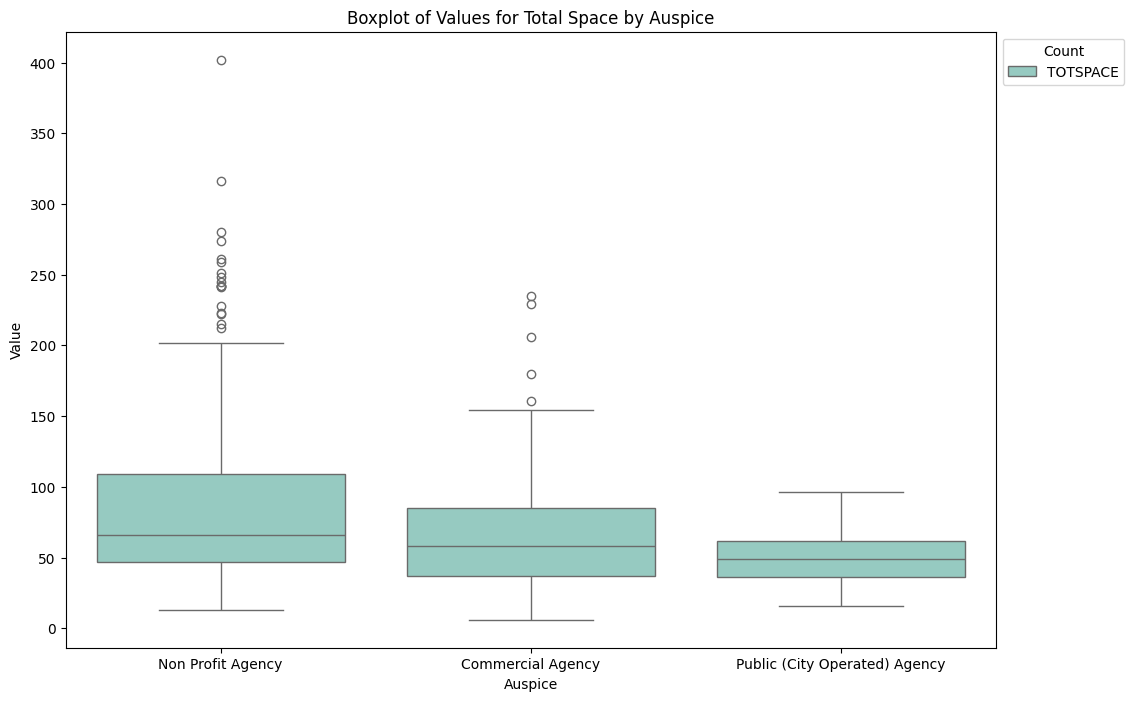

In [20]:
plt.figure(figsize=(12, 8))
sns.boxplot(x="AUSPICE", y="value", hue="variable", data=df_melt, palette="Set3")

# Adjust the plot
plt.xlabel("Auspice")
plt.ylabel("Value")
plt.title("Boxplot of Values for Total Space by Auspice")

plt.legend(title="Count", loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

In [ ]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     21.84
Date:                Sun, 10 Mar 2024   Prob (F-statistic):           5.06e-10
Time:                        02:22:58   Log-Likelihood:                -5597.4
No. Observations:                1063   AIC:                         1.120e+04
Df Residuals:                    1060   BIC:                         1.122e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [ ]:
print(anova_table)

                  sum_sq      df          F        PR(>F)
C(auspice)  9.611211e+04     2.0  21.843051  5.057716e-10
Residual    2.332065e+06  1060.0        NaN           NaN


In [ ]:
df_melt.dtypes

_id          int64
AUSPICE     object
variable    object
value        int64
dtype: object

In [ ]:
formula = 'value ~ C(AUSPICE)'
res = stat()
res.anova_stat(df=df_melt, res_var='value', anova_model=formula)
anova_summary = res.anova_summary

# Display ANOVA results
print(anova_summary)

                df        sum_sq       mean_sq          F        PR(>F)
C(AUSPICE)     2.0  9.611211e+04  48056.057145  21.843051  5.057716e-10
Residual    1060.0  2.332065e+06   2200.061571        NaN           NaN


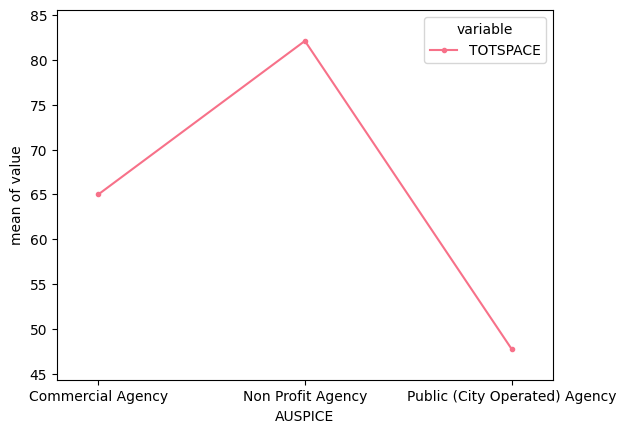

In [ ]:
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt

unique_variables = df_melt['variable'].unique()
colors = sns.color_palette("husl", n_colors=len(unique_variables))
fig = interaction_plot(x=df_melt['AUSPICE'], trace=df_melt['variable'], response=df_melt['value'], colors=colors)
plt.show()

In [ ]:
res.tukey_hsd(df=df_melt, res_var='value', xfac_var='AUSPICE', anova_model='value ~ C(AUSPICE)')
res.tukey_summary

/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to 

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,Non Profit Agency,Commercial Agency,17.119417,9.703599,24.535235,7.662434,0.001000
1,Non Profit Agency,Public (City Operated) Agency,34.334610,16.224077,52.445142,6.292710,0.001000
2,Commercial Agency,Public (City Operated) Agency,17.215193,-1.453146,35.883531,3.060857,0.077966


In [ ]:
tukey_results = pairwise_tukeyhsd(df_melt['value'], df_melt['AUSPICE'])
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,Non Profit Agency,Commercial Agency,17.119417,9.703599,24.535235,7.662434,0.001000
1,Non Profit Agency,Public (City Operated) Agency,34.334610,16.224077,52.445142,6.292710,0.001000
2,Commercial Agency,Public (City Operated) Agency,17.215193,-1.453146,35.883531,3.060857,0.077966


In [ ]:
res.tukey_hsd(df=df_melt, res_var='value', xfac_var='AUSPICE', anova_model='value ~ C(AUSPICE)')
res.tukey_summary.head()

/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to 

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,Non Profit Agency,Commercial Agency,17.119417,9.703599,24.535235,7.662434,0.001000
1,Non Profit Agency,Public (City Operated) Agency,34.334610,16.224077,52.445142,6.292710,0.001000
2,Commercial Agency,Public (City Operated) Agency,17.215193,-1.453146,35.883531,3.060857,0.077966


In [ ]:
import numpy as np

df['AUSPICE_ward'] = df['AUSPICE'] + '_' + df['ward'].astype(str)

# Display the updated DataFrame
print(df.head)

<bound method NDFrame.head of        _id  LOC_ID                                           LOC_NAME  \
0        1    1013              Lakeshore Community Child Care Centre   
1        2    1014            Alternative Primary School Parent Group   
2        3    1015     Cardinal Leger Child Care Centre (Scarborough)   
3        4    1016  George Brown - Richmond Adelaide Childcare Centre   
4        5    1017  Woodland Nursery School (Warden Woods Communit...   
...    ...     ...                                                ...   
1058  1059   14492       The Neighbourhood Group Downsview Child Care   
1059  1060   14496                               Lawrence Park School   
1060  1061   14497  The Munchkin Manor Daycare & Early Learning Ce...   
1061  1062   14501     Columbus Early Learning Centres - Regina Mundi   
1062  1063   14504                             Brightpath Leslieville   

                AUSPICE            ADDRESS    PCODE  ward  \
0     Non Profit Agency     101 